In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [31]:
train_data_file = "DataSet/zhengqi_train.txt"
test_data_file =  "DataSet/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

print(train_data.describe())
print(test_data.describe())

                V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  ...  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000  ...   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452  ...   
std       0.517957     0.918054     0.955116     0.895444     0.953813  ...   
min      -2.18200

# 1 数据预处理
* mean: 均值
* std: 标准差是数据集合中数值分散程度的一种度量。标准差越大，数据的波动性就越大，表示数据点相对于均值的分散程度越广。

## 1.1 异常值分析  
* 一般只分析训练集

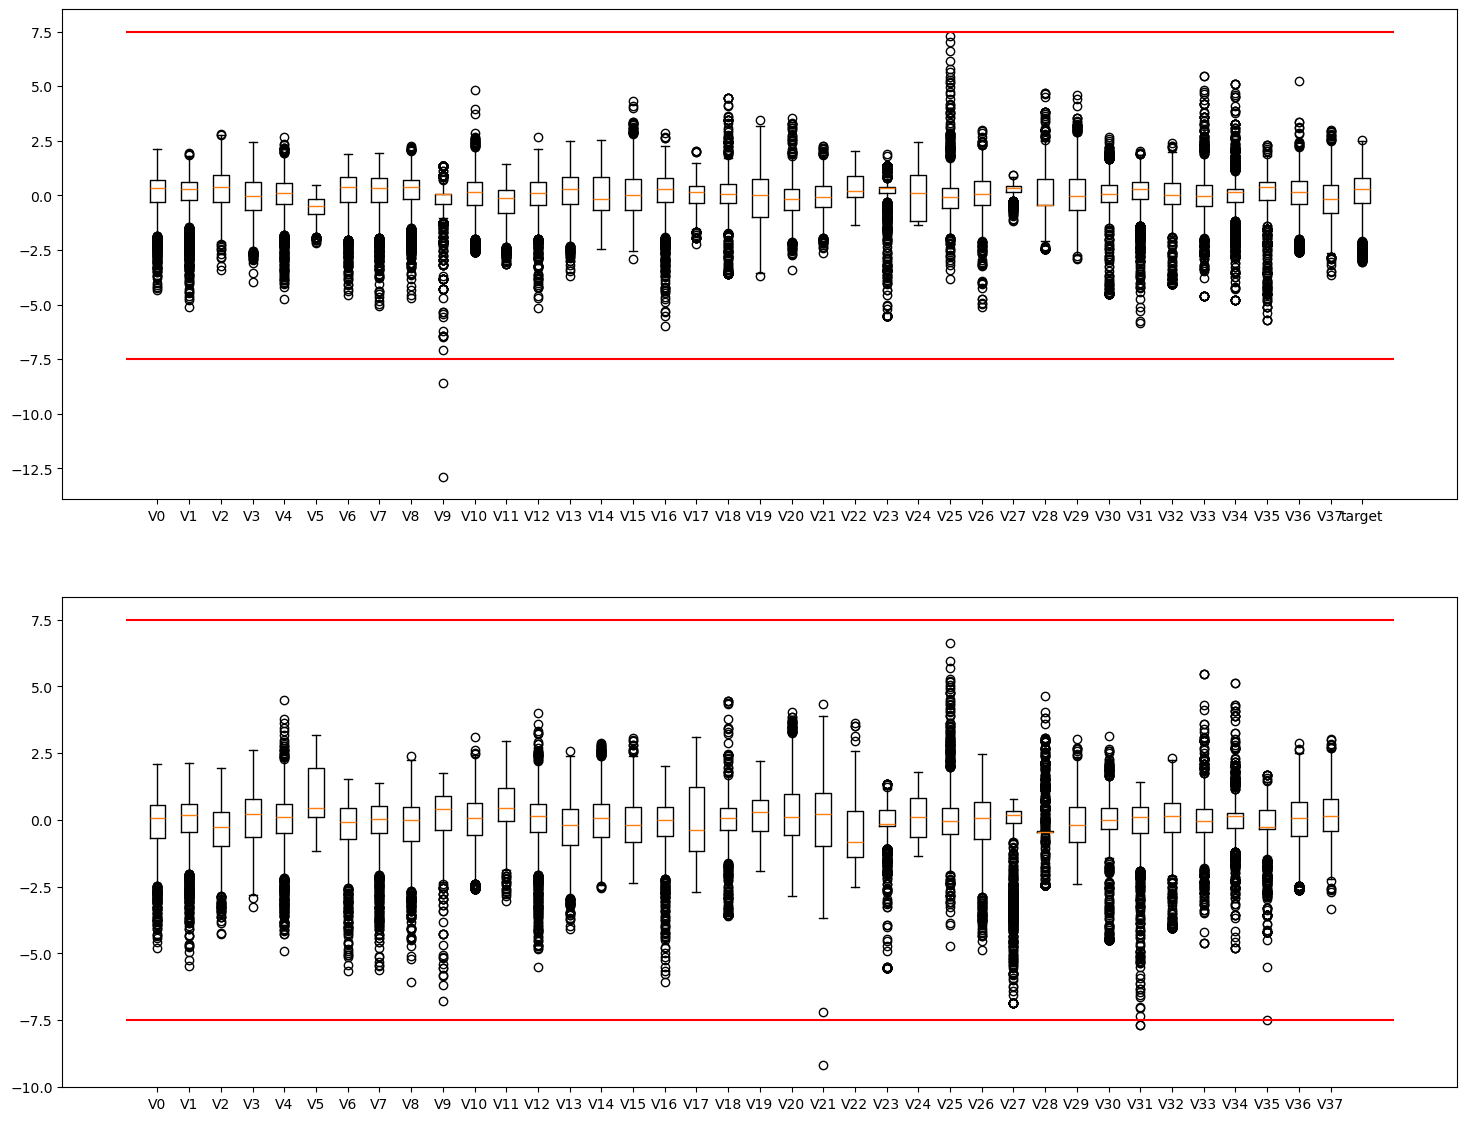

In [32]:
fig, axes = plt.subplots(2,1,figsize=(18, 14))

axes[0].boxplot(x=train_data.values,labels=train_data.columns)
axes[0].hlines([-7.5, 7.5], 0, 40, colors='r')

# 一般只分析训练集
axes[1].boxplot(x=test_data.values,labels=test_data.columns)
axes[1].hlines([-7.5, 7.5], 0, 40, colors='r')


## 1.2 删除异常值

In [33]:
train_data = train_data[train_data['V9']>-7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


## 1.3 最大最小归一化
标签不用标准化: 对训练集归一化之前, 把标签分隔开, 转换后再合上. 

In [34]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

## 1.4 查看数据分布

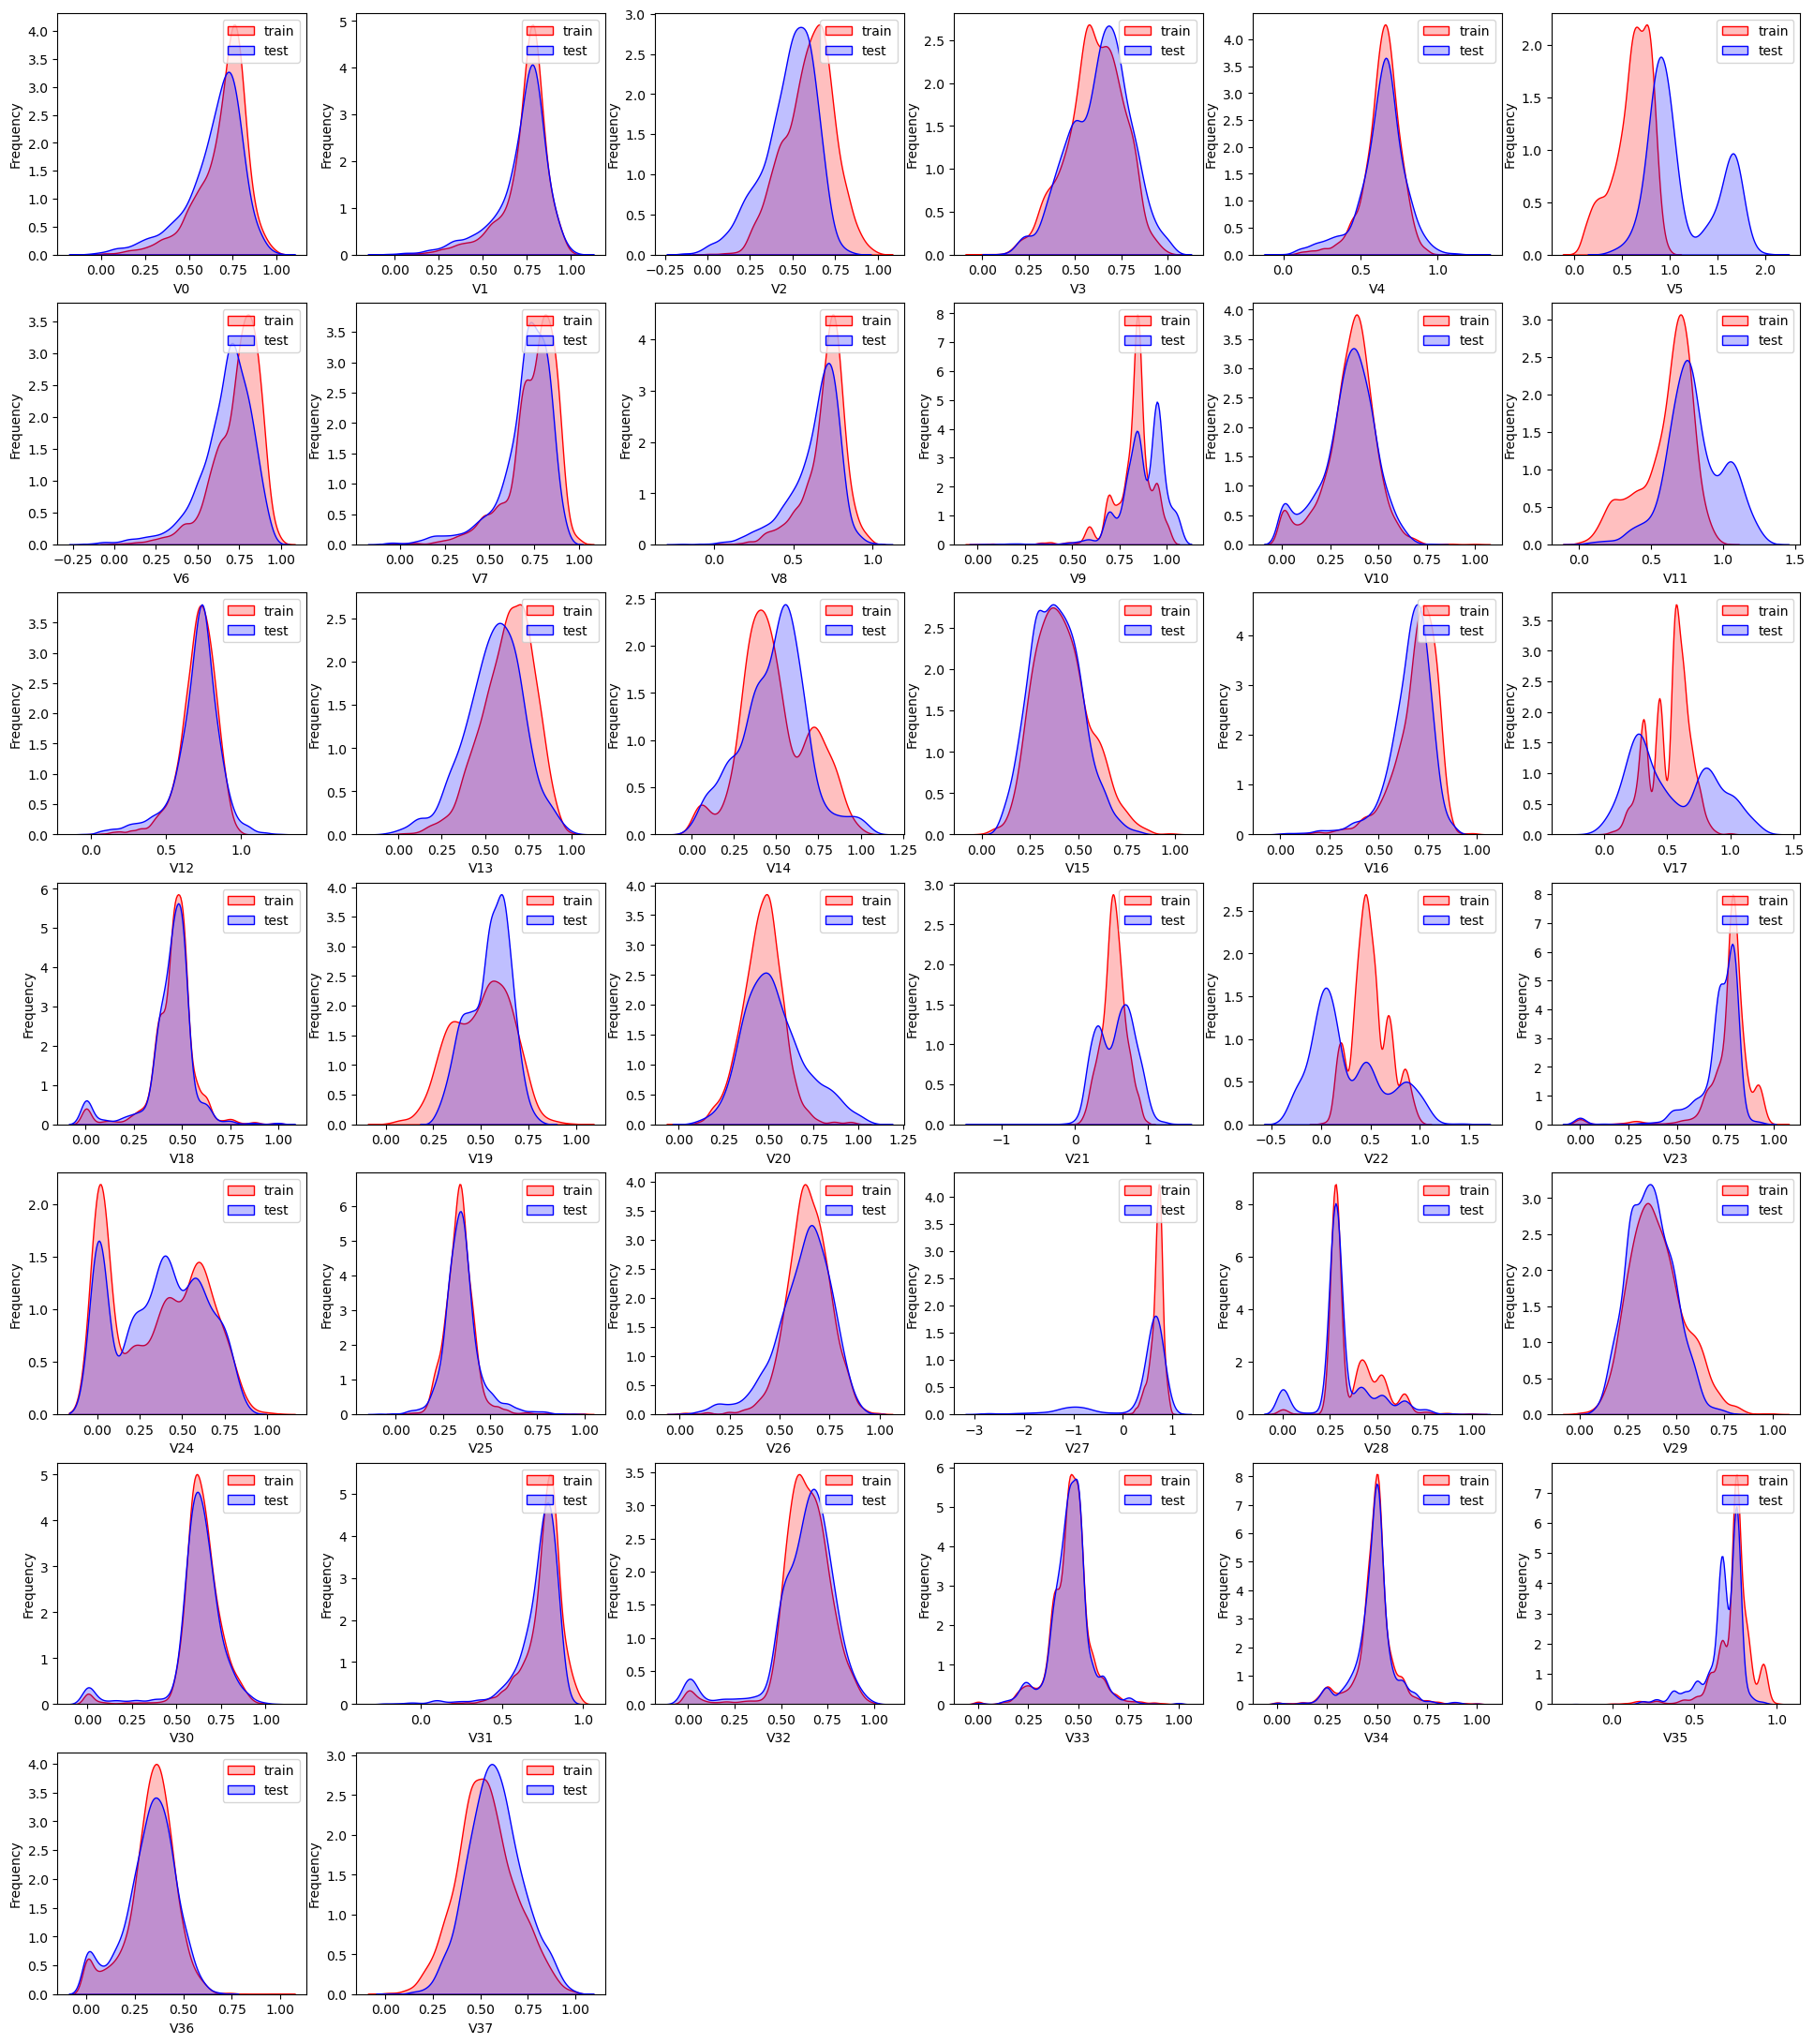

In [35]:
dist_cols = 6
dist_rows = len(test_data_scaler.columns)

plt.figure(figsize=(4*dist_cols,4*dist_rows))


for i, col in enumerate(test_data_scaler.columns):
    ax=plt.subplot(dist_rows,dist_cols,i+1)
    ax = sns.kdeplot(train_data_scaler[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data_scaler[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
 
plt.show()

## 1.5 查看特征相关性

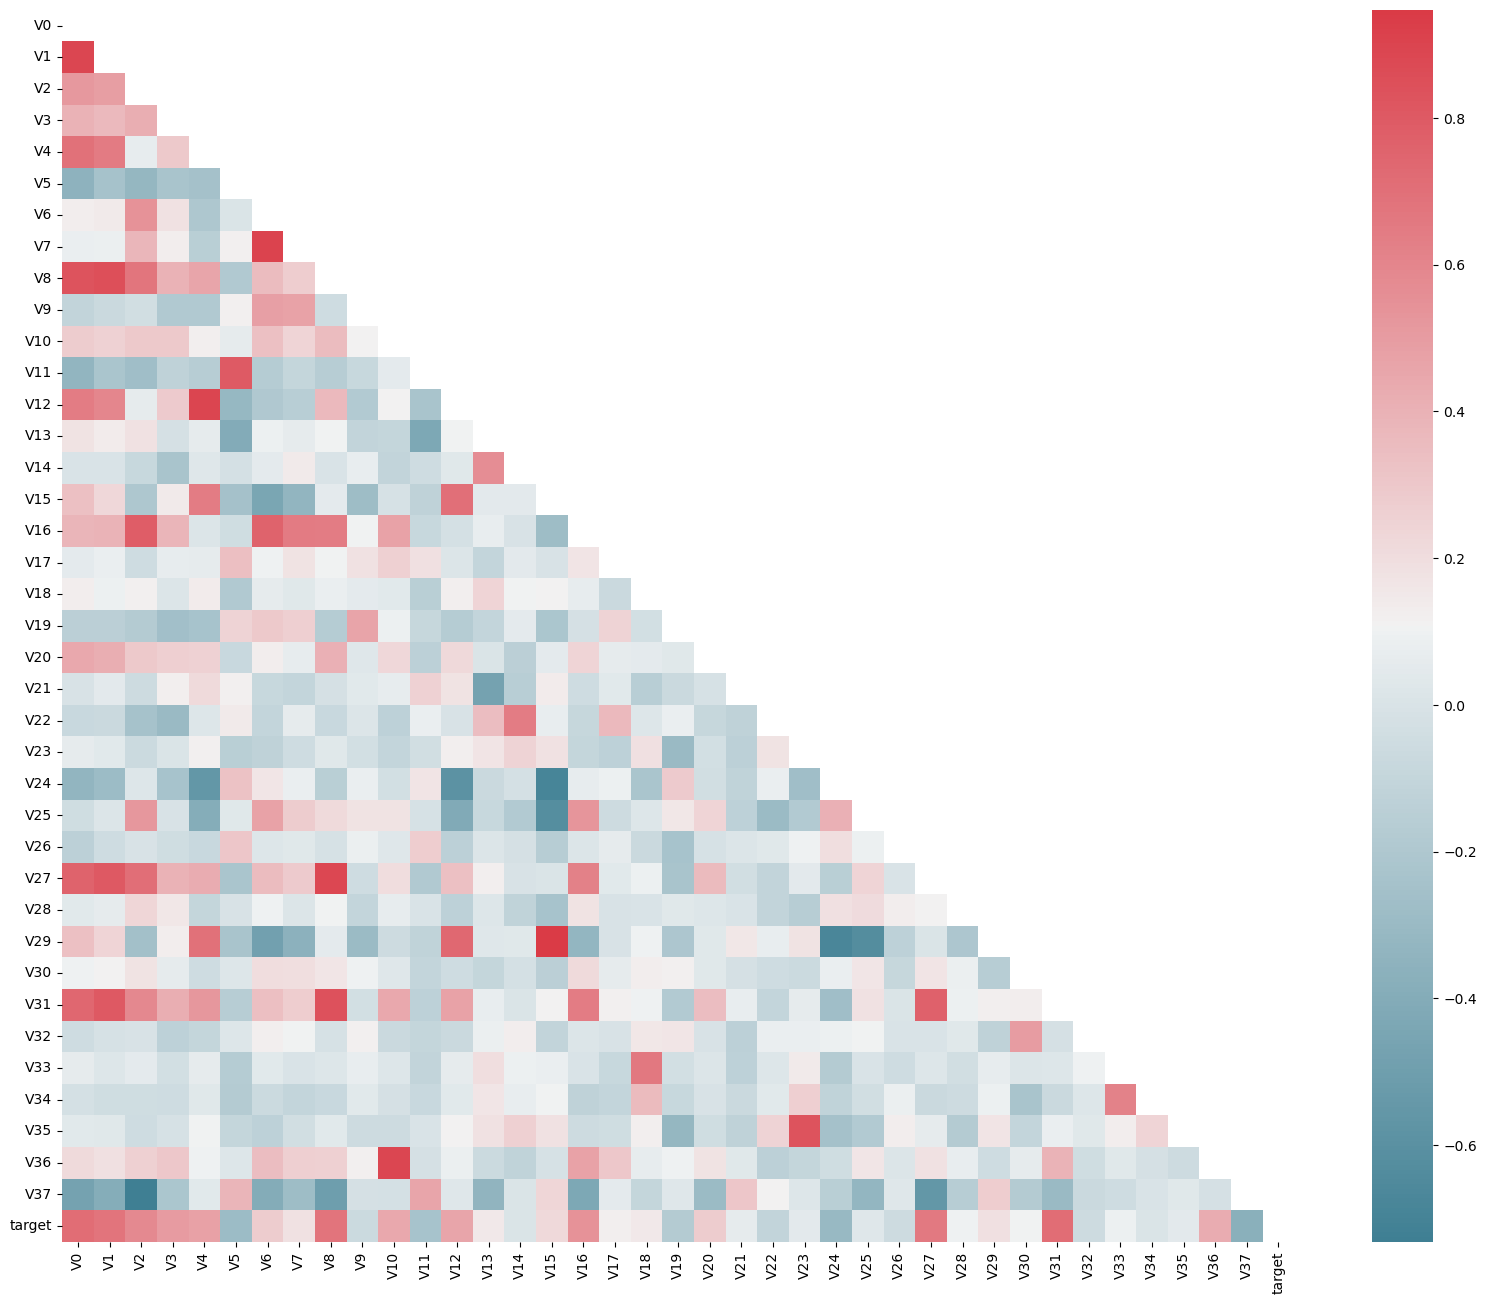

In [36]:
plt.figure(figsize=(20, 16))  
column = train_data_scaler.columns.tolist()  
mcorr = train_data_scaler[column].corr(method="spearman")  
mask = np.zeros_like(mcorr, dtype=bool)  
mask[np.triu_indices_from(mask)] = True  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  
plt.show()

# 2 数据降维

## 2.1 相关性分析  
挑出相关性绝对值大于 0,1 的特征: 
* 0-0.09 无相关性
* 0.1-0.3 弱相关
* 0.3-0.5 中等相关
* 0.5-1 强相关

In [37]:
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))

index0 = numerical_corr.sort_values(ascending=False).index
train_data_scaler[index0].corr('spearman')

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64


,target,V0,V31,V1,V8,V27,V2,V16,V3,V4,...,V11,V15,V29,V7,V19,V18,V13,V17,V22,V30
target,1.000000,0.712403,0.711636,0.682909,0.679469,0.657398,0.585850,0.545793,0.501622,0.478683,...,-0.234551,0.221290,0.190109,0.185321,-0.180111,0.149741,0.149199,0.126262,-0.112743,0.101378
V0,0.712403,1.000000,0.739116,0.894116,0.832151,0.763128,0.516817,0.388852,0.401150,0.697430,...,-0.333101,0.334135,0.334603,0.075732,-0.144295,0.132143,0.173861,0.055024,-0.076698,0.099242
V31,0.711636,0.739116,1.000000,0.807585,0.841469,0.765750,0.589890,0.642309,0.420134,0.521226,...,-0.131425,0.110674,0.121833,0.277283,-0.183185,0.094678,0.071517,0.115056,-0.106450,0.131453
V1,0.682909,0.894116,0.807585,1.000000,0.849034,0.807102,0.490239,0.396122,0.363749,0.651615,...,-0.221910,0.230395,0.240964,0.082766,-0.146559,0.093688,0.134595,0.081446,-0.072848,0.109216
V8,0.679469,0.832151,0.841469,0.849034,1.000000,0.887119,0.676417,0.642156,0.400915,0.455801,...,-0.161792,0.054701,0.050211,0.278231,-0.170237,0.079592,0.105380,0.102544,-0.078333,0.165204
V27,0.657398,0.763128,0.765750,0.807102,0.887119,1.000000,0.709534,0.620981,0.402468,0.424260,...,-0.190952,0.007156,0.006048,0.290620,-0.228613,0.091660,0.126831,0.036520,-0.111196,0.167073
V2,0.585850,0.516817,0.589890,0.490239,0.676417,0.709534,1.000000,0.783643,0.417190,0.062134,...,-0.271868,-0.206499,-0.255559,0.378984,-0.179416,0.114929,0.180477,-0.050935,-0.241206,0.176236
V16,0.545793,0.388852,0.642309,0.396122,0.642156,0.620981,0.783643,1.000000,0.388886,0.009749,...,-0.088716,-0.280952,-0.327558,0.651907,-0.019645,0.066147,0.074214,0.172978,-0.091204,0.217428
V3,0.501622,0.401150,0.420134,0.363749,0.400915,0.402468,0.417190,0.388886,1.000000,0.294049,...,-0.126924,0.145291,0.128079,0.132564,-0.265940,0.014697,-0.019453,0.067720,-0.305218,0.055660
V4,0.478683,0.697430,0.521226,0.651615,0.455801,0.424260,0.062134,0.009749,0.294049,1.000000,...,-0.164113,0.641180,0.692626,-0.150577,-0.237529,0.135792,0.061801,0.060753,0.021174,-0.053976


## 2.2 相关性初筛 


In [38]:
features_corr = numerical_corr.sort_values(ascending=False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr']>0.3] # 筛选出大于相关性大于0.3的特征
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features+['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.712403
2                  V31  0.711636
3                   V1  0.682909
4                   V8  0.679469
5                  V27  0.657398
6                   V2  0.585850
7                  V16  0.545793
8                   V3  0.501622
9                   V4  0.478683
10                 V12  0.460300
11                 V10  0.448682
12                 V36  0.425991
13                 V37  0.376443
14                 V24  0.305526


## 2.3 多重共线性分析 


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #多重共线性方差膨胀因子

#多重共线性
new_numerical=['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
                         'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X=np.matrix(train_data_scaler[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.501666426383405,
 19.920315849901424,
 24.64048176500875,
 11.816055964845349,
 4.958208708452918,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

## 2.4 PCA去除多重共线性 降维


In [40]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保持90%的信息
pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']
new_train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-1.969626e-17,-1.969626e-17,2.954440e-17,-5.908879e-17,8.124709e-17,-3.446846e-17,3.939253e-17,4.185456e-17,-4.924066e-17,9.478827e-17,1.723423e-17,1.280257e-16,-1.169466e-17,-6.155083e-17,-1.231017e-17,1.243327e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,-6.341045e-01,-5.906753e-01,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,-8.202809e-02,-7.721868e-02,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,7.286444e-03,-5.745946e-03,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,8.833765e-02,7.148033e-02,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,6.405187e-01,6.780732e-01,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,2.538000


In [41]:
#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,-3.939253e-17,-2.954440e-17,3.693050e-17,-4.431659e-17,8.370912e-17,-4.062355e-17,2.954440e-17,5.416473e-17,-5.416473e-17,9.355726e-17,2.338931e-17,1.255637e-16,-7.386099e-18,-5.539574e-17,-1.723423e-17,1.218706e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149757e-01,1.133507e-01,1.019252e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703986e-01,-5.340323e-01,-5.993757e-01,-5.870506e-01,-6.282570e-01,-4.902889e-01,-6.340826e-01,-5.907333e-01,-4.175205e-01,-4.310036e-01,-4.170386e-01,-3.602280e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090798e-01,-1.945195e-01,-1.315624e-01,-1.264127e-01,-1.236373e-01,-1.016579e-01,-9.663648e-02,-9.296527e-02,-8.203473e-02,-7.719454e-02,-7.139815e-02,-7.479510e-02,-7.707824e-02,-6.615127e-02,-0.348500
50%,-1.417105e-02,-1.277241e-02,2.112164e-02,-2.337408e-02,-5.122829e-03,-1.355201e-02,-1.750972e-04,-4.654725e-03,2.571686e-03,-1.482794e-03,7.282883e-03,-5.720374e-03,-4.173527e-03,1.043671e-03,-1.760922e-03,-5.305989e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281659e-01,9.993371e-02,1.272081e-01,9.656824e-02,1.002642e-01,9.059510e-02,8.833950e-02,7.147004e-02,6.779433e-02,7.579581e-02,7.114856e-02,6.357501e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358961e+00,6.191582e-01,7.370131e-01,6.448429e-01,5.839521e-01,6.405525e-01,6.780804e-01,5.157652e-01,4.977655e-01,4.674133e-01,4.571871e-01,2.538000


# 3 模型训练

In [42]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 3.1 切分训练集和线下验证集

In [43]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

## 3.2 定义绘制模型学习曲线函数  

In [44]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

# 4 模型

## 多元线性回归

In [45]:
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.27168770311062374


[0.67942549 0.6522145  0.6475852  0.64468471 0.64126484]
[0.57760132 0.61240383 0.6198571  0.62195359 0.62311351]


<module 'matplotlib.pyplot' from 'D:\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

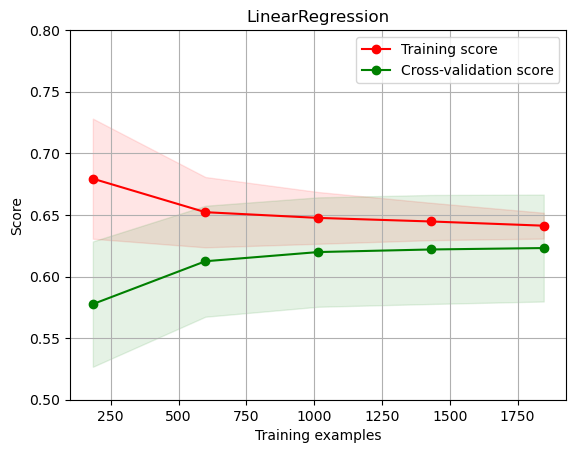

In [46]:
X = train_data.values
y = train_target.values
 
# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.8), cv=cv, n_jobs=1)

## K近邻回归

In [61]:
    clf = KNeighborsRegressor(n_neighbors=5) # 最近n个
    clf.fit(train_data, train_target)
    score = mean_squared_error(test_target, clf.predict(test_data))
    print("K: ", i,"KNeighborsRegressor:   ", score)

K:  11 KNeighborsRegressor:    0.26638624166089964


[0.67543083 0.73457298 0.75573143 0.76591564 0.77148617]
[0.51097692 0.58717724 0.61998739 0.63621484 0.64689697]


<module 'matplotlib.pyplot' from 'D:\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

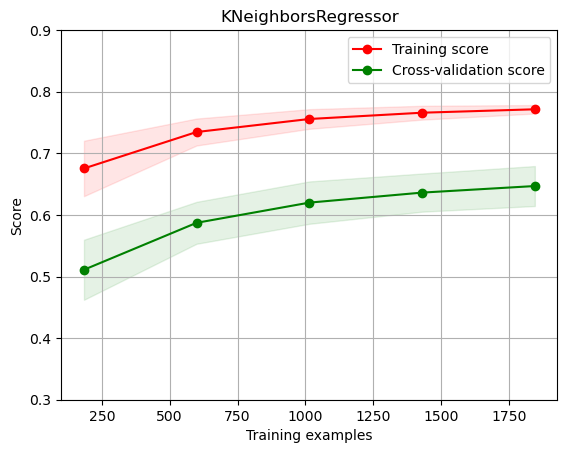

In [62]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsRegressor(n_neighbors=5)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.3, 0.9), cv=cv, n_jobs=1)

## 决策树回归

In [63]:
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)

score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.6023186228373703


[1. 1. 1. 1. 1.]
[0.14084471 0.23565851 0.29104646 0.31746151 0.33130514]


<module 'matplotlib.pyplot' from 'D:\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

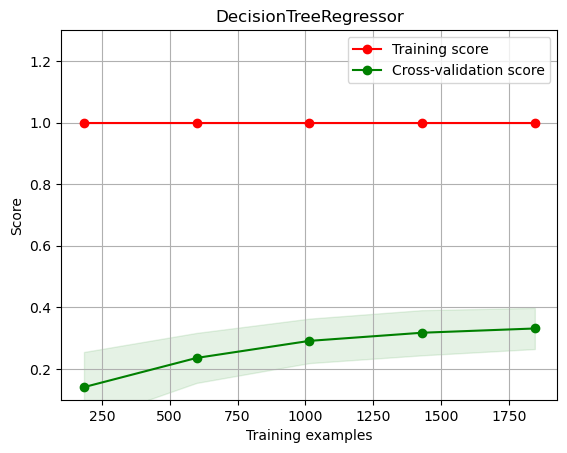

In [64]:
X = train_data.values
y = train_target.values
 
# 决策树回归
title = r"DecisionTreeRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.1, 1.3), cv=cv, n_jobs=1)

## 随机森林回归

In [66]:
clf = RandomForestRegressor(n_estimators=200) # 200棵树模型
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.2488943993791955


[0.9368024  0.9483009  0.95193275 0.95435248 0.95575991]
[0.54630626 0.61992345 0.64580588 0.66053997 0.67367615]


<module 'matplotlib.pyplot' from 'D:\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

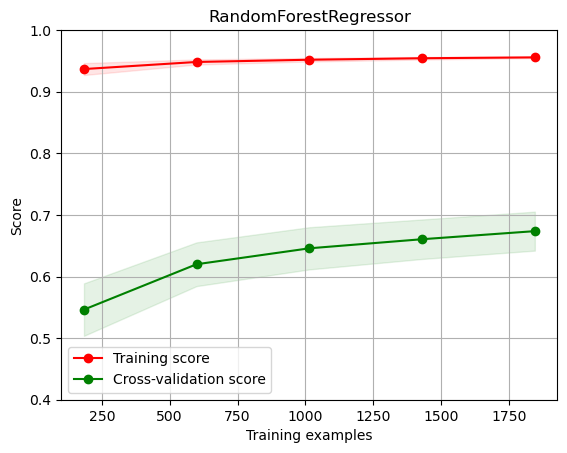

In [67]:
X = train_data.values
y = train_target.values
 
# K近邻回归
title = r"RandomForestRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_estimators=200)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.4, 1.0), cv=cv, n_jobs=1)